# Image Thresholding

## Simple Thresholding

The function "cv2.threshold" in Python is used to perform image thresholding, a common technique in image processing. Here's a refined description of the function {cite:p}`opencv_library, OpenCVDocumentation`:

```python
cv2.threshold(src, thresh, maxval, type[, dst]) -> retval, dst
```

This function takes an input image (src) and applies a thresholding operation to it, producing a binary image. The thresholding operation involves comparing each pixel value in the source image to a specified threshold value (thresh). Pixels with values greater than or equal to the threshold are set to a specified maximum value (maxval), while pixels with values less than the threshold are set to zero (or a minimum value, depending on the type of thresholding specified). The resulting binary image is returned as the destination image (dst).

The function also returns two values: "retval," which is the threshold value used (this can be useful in adaptive thresholding), and "dst," the resulting thresholded image.

The "type" parameter determines the type of thresholding to be applied, and it can take one of the following values:
- cv2.THRESH_BINARY: Binary thresholding, where pixels above the threshold are set to maxval, and pixels below are set to zero.
- cv2.THRESH_BINARY_INV: Inverse binary thresholding, where pixels above the threshold are set to zero, and pixels below are set to maxval.
- cv2.THRESH_TRUNC: Truncated thresholding, where pixels above the threshold are set to the threshold value, and pixels below remain unchanged.
- cv2.THRESH_TOZERO: Thresholding to zero, where pixels above the threshold remain unchanged, and pixels below are set to zero.
- cv2.THRESH_TOZERO_INV: Inverse thresholding to zero, where pixels above the threshold are set to zero, and pixels below remain unchanged.

The optional "dst" parameter allows you to provide a pre-allocated output image to store the thresholded result. This parameter is useful when you want to reuse an existing image buffer instead of creating a new one.

### THRESH_BINARY

\begin{equation}
\text{Output }(x,y) = \begin{cases}\text{maximum value}&\mbox{if source(x,y) > threshold value},\\0,&\mbox{otherwise}\end{cases}
\end{equation} 

<span style='color:Blue'><strong>Example</strong></span>: In this Example, we employ the [image dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_images.html#sklearn.datasets.load_sample_images) from sklearn and perform fundamental operations using OpenCV.

In [1]:
import matplotlib.pyplot as plt
import cv2

plt.rcParams.update({'font.family' : 'Calibri', 'axes.titlesize' : 16})  # Set font properties for plots
# Define a function to display images with titles and optional settings
def ImShow(Images, Names, title='Images', grayscale=False):
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(11, 5))  # Create a figure with 1 row and 2 columns of subplots
    ax = ax.ravel()  # Flatten the subplots for easier manipulation

    # Iterate over the first two images
    for i in range(2):
        if grayscale:
            _ = ax[i].imshow(Images[i], 'gray')  # Display the image in grayscale
        else:
            _ = ax[i].imshow(Images[i])  # Display the image in color
        _ = ax[i].set_aspect(1)  # Set aspect ratio to 1 (square aspect)
        _ = ax[i].axis('off')  # Turn off axis
        _ = ax[i].set_title(Names[i], weight='bold')  # Set image title with bold font

    if title:
        _ = fig.suptitle(title, weight='bold', fontsize=18)  # Set main title if provided
    
    plt.tight_layout()  # Adjust layout for better spacing

    return fig, ax

# Load sample images
from sklearn.datasets import load_sample_images
Images = load_sample_images()['images']
# Extract image names from file paths, removing extension and converting to title case
Names = [x.split("/")[-1].replace('.jpg', '').title() for x in load_sample_images()['filenames']]

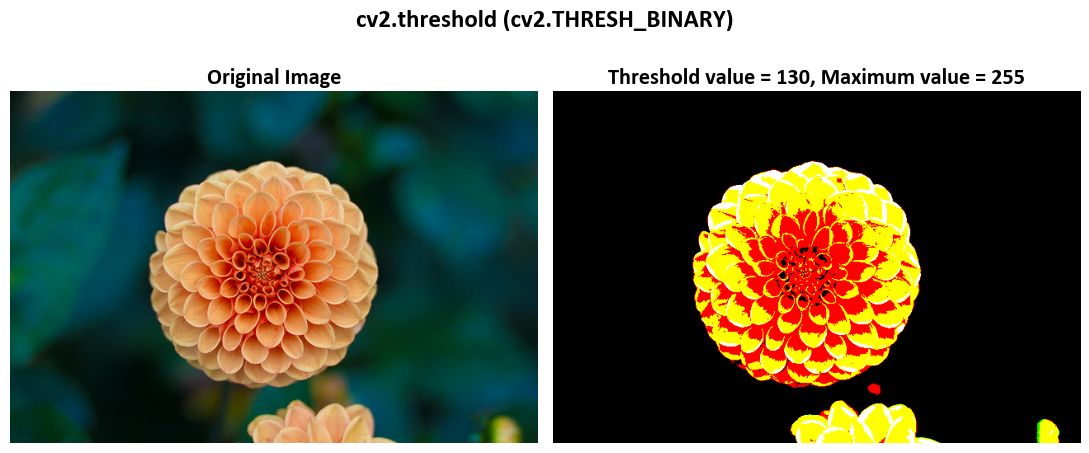

In [2]:
# Copy the second image from the "Images" list and create a new image "Img"
Img = Images[1].copy()

# Create a copy of the "Img" image for later comparison
Out = Img.copy()

# Apply a binary threshold to the "Img" image
# The threshold value is 130, and the maximum value after thresholding is 255
# The result is stored in the "Out" image
_, Out = cv2.threshold(Img, 130, 255, cv2.THRESH_BINARY)

# Show both the original "Img" image and the thresholded "Out" image
# Add titles to the images for clarity
fig, ax = ImShow([Img, Out], ['Original Image', 'Threshold value = 130, Maximum value = 255'],
                 title='cv2.threshold (cv2.THRESH_BINARY)')

### THRESH_BINARY_INV

$$\text{Output} (x,y) = \begin{cases}0&\mbox{if source(x,y) > threshold value},\\\text{maximum value},&\mbox{otherwise}\end{cases}$$

<font color='Blue'><b>Example</b></font>:

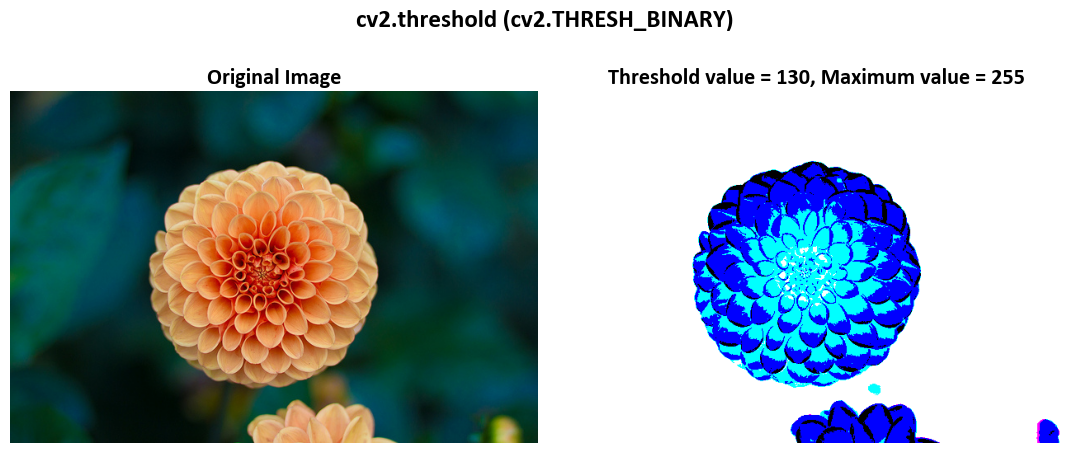

In [3]:
# Copy the second image from the "Images" list and create a new image "Img"
Img = Images[1].copy()

# Create a copy of the "Img" image for later comparison
Out = Img.copy()

# Apply a binary threshold with inverse operation to the "Img" image
# The threshold value is set to 130
# The maximum value after thresholding is set to 255
# The specific thresholding type used is cv2.THRESH_BINARY_INV
# The result is stored in the "Out" image
_, Out = cv2.threshold(Img, 130, 255, cv2.THRESH_BINARY_INV)

# Show both the original "Img" image and the thresholded "Out" image
# Add titles to the images for clarity
fig, ax = ImShow([Img, Out], ['Original Image', 'Threshold value = 130, Maximum value = 255'],
                 title='cv2.threshold (cv2.THRESH_BINARY)')

### THRESH_TRUNC

$$\text{Output} (x,y) = \begin{cases}\text{threshhold}&\mbox{if source(x,y) > tthreshold value},\\\text{source(x,y)},&\mbox{otherwise}\end{cases}$$

<font color='Blue'><b>Example</b></font>:

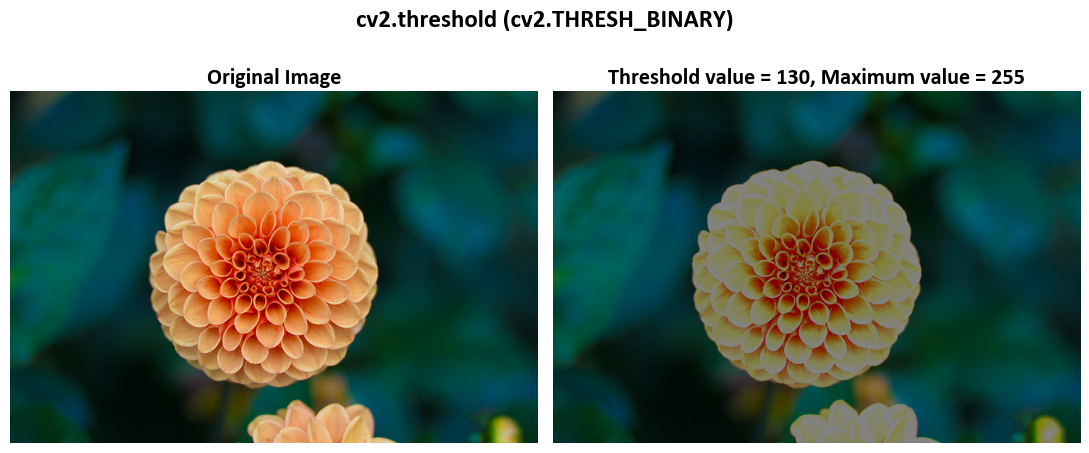

In [4]:
# Copy the second image from the "Images" list and create a new image "Img"
Img = Images[1].copy()

# Create a copy of the "Img" image for later comparison
Out = Img.copy()

# Apply a thresholding operation to the "Img" image
# The threshold value is set to 130
# The maximum value after thresholding is set to 255
# The thresholding type used is cv2.THRESH_TRUNC
# The result is stored in the "Out" image
_ , Out = cv2.threshold(Img, thresh=130, maxval=255, type=cv2.THRESH_TRUNC)

# Show both the original "Img" image and the thresholded "Out" image
# Add titles to the images for clarity
fig, ax = ImShow([Img, Out], ['Original Image', 'Threshold value = 130, Maximum value = 255'],
                 title='cv2.threshold (cv2.THRESH_BINARY)')

Now, breaking down each part:

1. **Copying the Second Image**: The code first copies the second image from the "Images" list and stores it in a new image variable called "Img."

2. **Creating a Copy for Later Comparison**: A copy of the "Img" image is created and stored in the "Out" variable. This allows for later comparison between the original and thresholded images.

3. **Thresholding Operation**: The `cv2.threshold` function is applied to the "Img" image. The threshold value is set to 130, and the maximum value after thresholding is set to 255. The specific thresholding type used is `cv2.THRESH_TRUNC`. This type truncates (limits) pixel values above the threshold to the threshold value, effectively "clipping" bright regions.

4. **Showing Original and Thresholded Images**: The `ImShow` function (presumably defined elsewhere) is used to display both the original "Img" image and the thresholded "Out" image side by side. Titles are added to the images for clarity, indicating the threshold value and maximum value used in the thresholding operation.

### THRESH_TOZERO

$$\text{Output} (x,y) = \begin{cases}\text{source(x,y)}&\mbox{if source(x,y) > tthreshold value},\\0,&\mbox{otherwise}\end{cases}$$

<font color='Blue'><b>Example</b></font>:

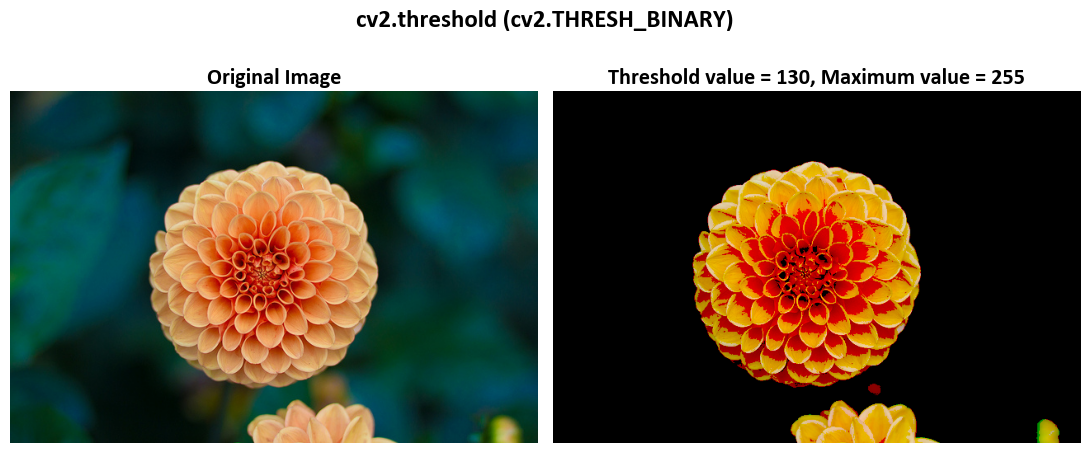

In [5]:
# Copy the second image from the "Images" list and create a new image "Img"
Img = Images[1].copy()

# Create a copy of the "Img" image for later comparison
Out = Img.copy()

# Apply a thresholding operation to the "Img" image
# The threshold value is set to 130
# The maximum value after thresholding is set to 255
# The thresholding type used is cv2.THRESH_TOZERO
# The result is stored in the "Out" image
_ , Out = cv2.threshold(Img, thresh=130, maxval=255, type=cv2.THRESH_TOZERO)

# Show both the original "Img" image and the thresholded "Out" image
# Add titles to the images for clarity
fig, ax = ImShow([Img, Out], ['Original Image', 'Threshold value = 130, Maximum value = 255'],
                 title='cv2.threshold (cv2.THRESH_BINARY)')

Breaking down each part:

1. **Copying the Second Image**: The code first copies the second image from the "Images" list and stores it in a new image variable called "Img."

2. **Creating a Copy for Later Comparison**: A copy of the "Img" image is created and stored in the "Out" variable. This allows for later comparison between the original and thresholded images.

3. **Thresholding Operation**: The `cv2.threshold` function is applied to the "Img" image. The threshold value is set to 130, and the maximum value after thresholding is set to 255. The specific thresholding type used is `cv2.THRESH_TOZERO`. This type sets pixel values below the threshold to zero and leaves pixel values above the threshold unchanged.

4. **Showing Original and Thresholded Images**: The `ImShow` function (presumably defined elsewhere) is used to display both the original "Img" image and the thresholded "Out" image side by side. Titles are added to the images for clarity, indicating the threshold value and maximum value used in the thresholding operation.

### THRESH_TOZERO_INV

$$\text{Output} (x,y) = \begin{cases}0&\mbox{if source(x,y) > tthreshold value},\\\text{source(x,y)},&\mbox{otherwise}\end{cases}$$

<font color='Blue'><b>Example</b></font>:

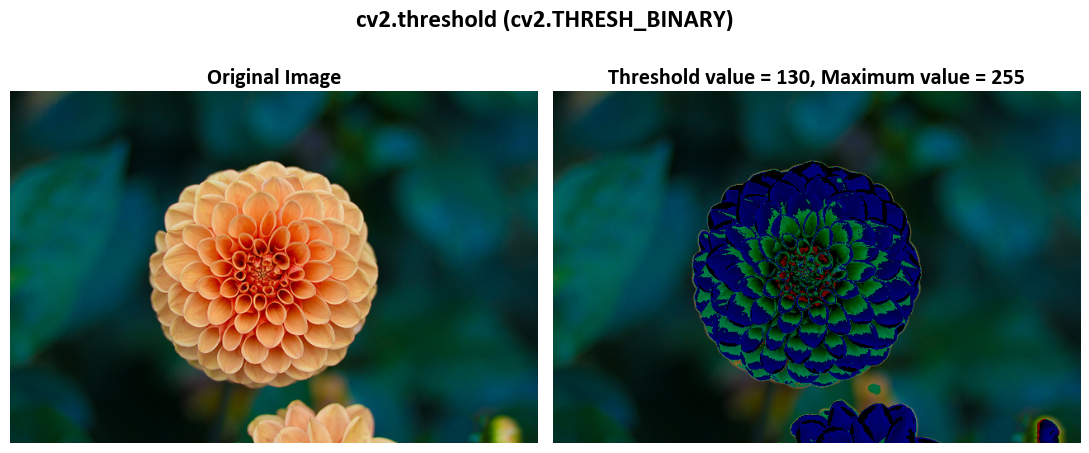

In [6]:
# Copy the second image from the "Images" list and create a new image "Img"
Img = Images[1].copy()

# Create a copy of the "Img" image for later comparison
Out = Img.copy()

# Apply a thresholding operation to the "Img" image
# The threshold value is set to 130
# The maximum value after thresholding is set to 255
# The thresholding type used is cv2.THRESH_TOZERO_INV
# The result is stored in the "Out" image
_ , Out = cv2.threshold(Img, thresh=130, maxval=255, type=cv2.THRESH_TOZERO_INV)

# Show both the original "Img" image and the thresholded "Out" image
# Add titles to the images for clarity
fig, ax = ImShow([Img, Out], ['Original Image', 'Threshold value = 130, Maximum value = 255'],
                 title='cv2.threshold (cv2.THRESH_BINARY)')

Breaking down each part:

1. **Copying the Second Image**: The code first copies the second image from the "Images" list and stores it in a new image variable called "Img."

2. **Creating a Copy for Later Comparison**: A copy of the "Img" image is created and stored in the "Out" variable. This allows for later comparison between the original and thresholded images.

3. **Thresholding Operation**: The `cv2.threshold` function is applied to the "Img" image. The threshold value is set to 130, and the maximum value after thresholding is set to 255. The specific thresholding type used is `cv2.THRESH_TOZERO_INV`. This type sets pixel values above the threshold to zero and leaves pixel values below the threshold unchanged.

4. **Showing Original and Thresholded Images**: The `ImShow` function (presumably defined elsewhere) is used to display both the original "Img" image and the thresholded "Out" image side by side. Titles are added to the images for clarity, indicating the threshold value and maximum value used in the thresholding operation.

## AdaptiveThresholding

The function "cv2.adaptiveThreshold" in Python is a part of the OpenCV library, which is used for image processing. It performs adaptive thresholding on a source image, producing a binary (black and white) image based on the local properties of the input image. The refined description of the function is as follows:

```python
cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) → dst
```

**Parameters:**

1. `src`: Input image (single-channel, 8-bit or 32-bit floating point).
2. `maxValue`: The maximum value to assign to pixels that pass the adaptive thresholding. Typically set to 255 for binary images.
3. `adaptiveMethod`: Method used to calculate the threshold value for each pixel. It can take one of the following values:
   - `cv2.ADAPTIVE_THRESH_MEAN_C`: Threshold value is the mean of the neighborhood area.
   - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: Threshold value is the weighted sum of neighborhood values where weights are a Gaussian window.
4. `thresholdType`: Type of thresholding to apply. It can take one of the following values:
   - `cv2.THRESH_BINARY`: Pixels with values greater than the calculated threshold are set to `maxValue`, and pixels below are set to 0.
   - `cv2.THRESH_BINARY_INV`: Inverse binary thresholding, where pixels above the threshold are set to 0, and pixels below are set to `maxValue`.
5. `blockSize`: Size of the neighborhood area (odd number, typically 3, 5, 7, etc.). The threshold is calculated based on the pixel values within this local region.
6. `C`: Constant subtracted from the mean (or weighted mean, in case of Gaussian) to calculate the final threshold value. It allows adjusting the sensitivity of the thresholding.
7. `dst` (optional): Destination image where the result will be stored. If not provided, a new image will be created.

**Returns:**

The output image (`dst`) after applying the adaptive thresholding.

**Usage:**

This function is useful for segmenting an image into regions of interest, separating objects from the background, or enhancing features in images with varying lighting conditions. The adaptive thresholding method helps handle variations in local image intensity, making it particularly useful for images with uneven illumination.

### THRESH_BINARY

\begin{equation}
\text{Output }(x,y) = \begin{cases}\text{maximum value}&\mbox{if source(x,y)} > T(x,y),\\0,&\mbox{otherwise}\end{cases}
\end{equation} 

<font color='Blue'><b>Example</b></font>:

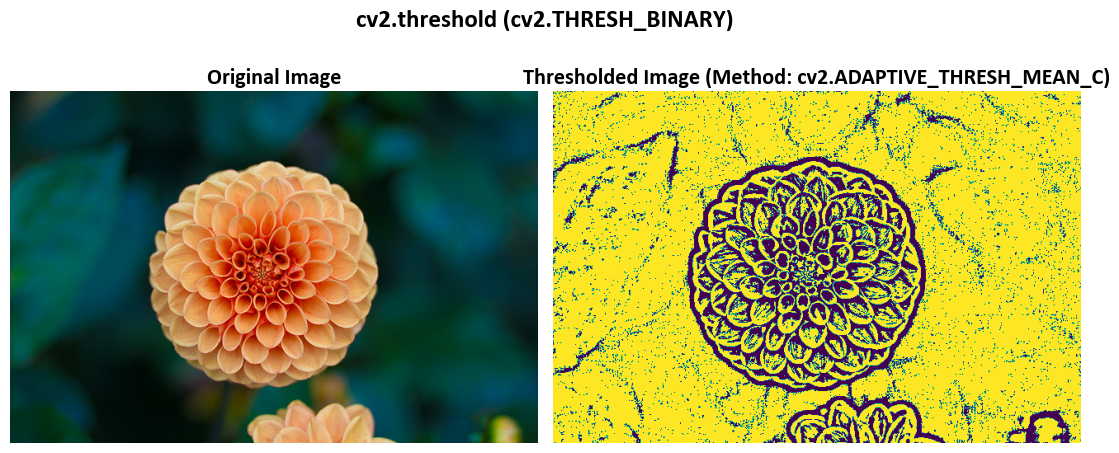

In [7]:
# Import necessary libraries
import cv2

# Copy the second image from the "Images" list and create a new image "Img"
Img = Images[1].copy()

# Create a copy of the "Img" image for later comparison
Out = Img.copy()

# Convert the "Img" image to grayscale and apply adaptive thresholding
Out = cv2.adaptiveThreshold(cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Show both the original "Img" image and the thresholded "Out" image
# Add titles to the images for clarity
# Assuming that the "ImShow" function is defined elsewhere
fig, ax = ImShow([Img, Out], ['Original Image', 'Thresholded Image (Method: cv2.ADAPTIVE_THRESH_MEAN_C)'],
                 title='cv2.threshold (cv2.THRESH_BINARY)')

### THRESH_BINARY_INV

$$\text{Output }(x,y) = \begin{cases}0&\mbox{if source(x,y)} > T(x,y),\\\text{maximum value},&\mbox{otherwise}\end{cases}$$

<font color='Blue'><b>Example</b></font>:

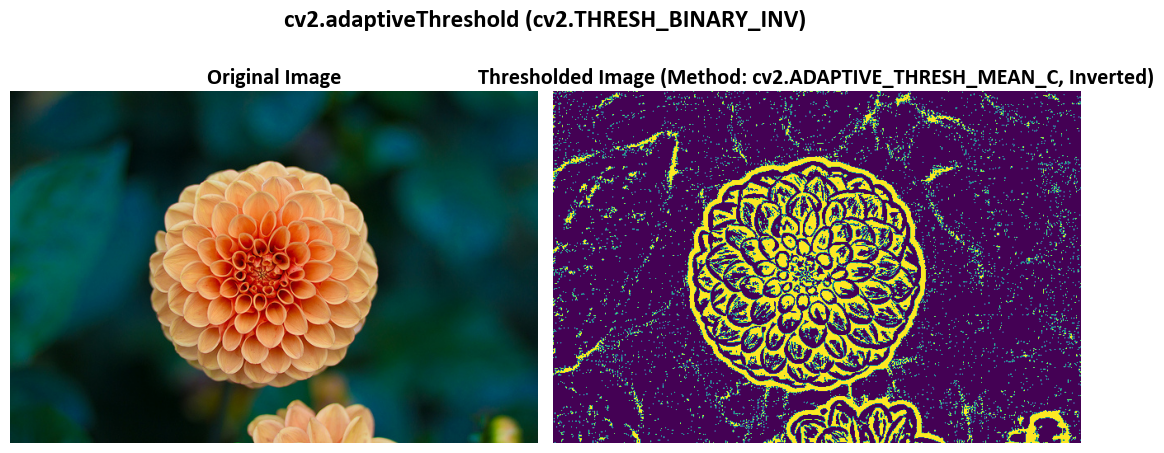

In [8]:
# Import necessary libraries
import cv2

# Copy the second image from the "Images" list and create a new image "Img"
Img = Images[1].copy()

# Create a copy of the "Img" image for later comparison
Out = Img.copy()

# Convert the "Img" image to grayscale and apply adaptive thresholding with an inverted binary threshold
Out = cv2.adaptiveThreshold(cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Show both the original "Img" image and the thresholded "Out" image
# Add titles to the images for clarity
# Assuming that the "ImShow" function is defined elsewhere
fig, ax = ImShow([Img, Out], ['Original Image', 'Thresholded Image (Method: cv2.ADAPTIVE_THRESH_MEAN_C, Inverted)'],
                 title='cv2.adaptiveThreshold (cv2.THRESH_BINARY_INV)')